In [3]:
from keras.models import load_model,Sequential
from keras.layers import Input, Dense, LSTM
from keras.utils import to_categorical
from keras.callbacks import Callback, ModelCheckpoint


import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.metrics import confusion_matrix

def signal_to_catagorical(data):
    data.loc[data['Signal'] == 'wait ot hold', 'Signal'] = 'wait or hold'
    data.loc[data['Signal'] == 'buy', 'Signal'] = 0
    data.loc[data['Signal'] == 'sell', 'Signal'] = 1 
    data.loc[data['Signal'] == 'wait or hold', 'Signal'] = 2 
    return data

def add_shift_day(data,day):
    r_list = []
    for i in range(day,len(data)):#Number mean day to shift
        r_list.append(data[i-day : i])
    return np.array(r_list)



In [6]:
datalist = [f for f in glob.glob("Dataset/*.csv")]
print('have stock = ',len(datalist))

#test
test_list = []
for test_name in range(74,76):
    df = pd.read_csv(datalist[test_name])
    test = df
    # test = add_shift_day(test,30)
    test_list.append(test)

have stock =  76


In [15]:
model = load_model('Model train/model_lstm_trend_data_14.h5')

C:\Users\jame_\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jame_\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\jame_\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

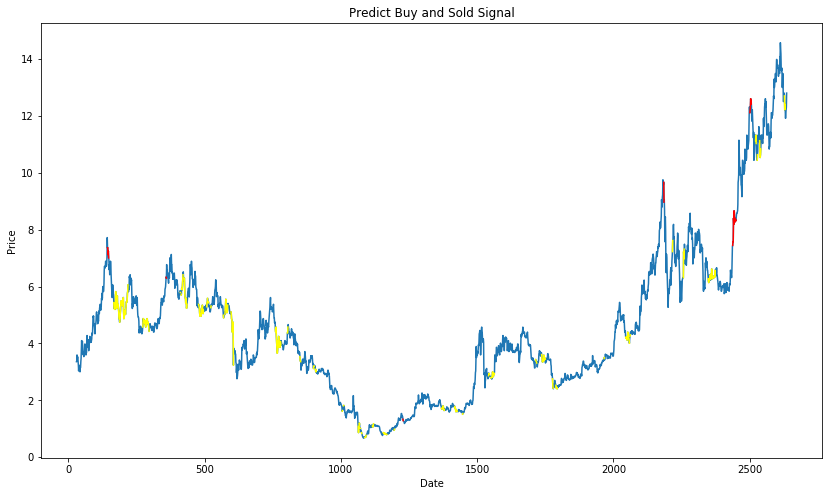

C:\Users\jame_\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jame_\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\jame_\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

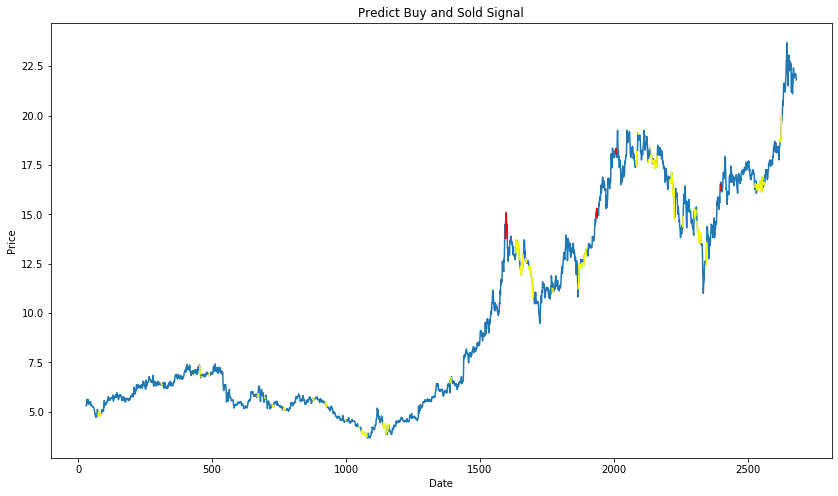

In [16]:
for i in range(len(test_list)):
    p_test = test_list[i]
    p_test = signal_to_catagorical(p_test)
    x_test = p_test[['MACD-SL-1_n','DMI_n','MACD-SL-2_n','Close_n']].values
    x_test = add_shift_day(x_test,30)
    y_test = p_test['Signal'].values
    y_test = y_test.tolist()
    del y_test[0:30]
    y_test = np.array(y_test)
    y_pred = model.predict(x_test)
    y_pred = np.argmax(y_pred,axis = -1)
    p_test = p_test.iloc[30:]

    p_test['pred'] = y_pred
    p_test['pred_b'] = np.where(p_test['pred'] == 0,p_test['Close'],np.nan)
    p_test['pred_s'] = np.where(p_test['pred'] == 1,p_test['Close'],np.nan)

    plt.figure(figsize=(14,8))
    # plt.grid()
    plt.title('Predict Buy and Sold Signal')
    plt.plot(p_test['Close'])
    plt.plot(p_test['pred_b'],color='yellow')
    plt.plot(p_test['pred_s'],color='red')
    plt.ylabel('Price')
    plt.xlabel('Date')
    plt.show()

In [12]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, 30, 100)           42000     
_________________________________________________________________
dropout_12 (Dropout)         (None, 30, 100)           0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 30, 100)           80400     
_________________________________________________________________
dropout_13 (Dropout)         (None, 30, 100)           0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 50)                30200     
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 153       
Total params: 152,753
Trainable params: 152,753
Non-trainable params: 0
________________________________________________